<a href="https://colab.research.google.com/github/offthetab/ML_homework/blob/main/%D0%9F%D0%A0_4_%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Будем использоввать Fraud dataset для выявления мошенничества с кредитными картами

# The dataset fraud_data.csv was downloaded from the Coursera website. Each row in fraud_data.csv corresponds to a credit card transaction.
# Features include confidential variables V1 through V28 as well as Amount which is the amount of the transaction.

# The target is stored in the “class” column, which takes the value of 1 for fraudulent transactions and 0 otherwise.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/fraud_data.csv")
print(data.shape)
data.head()

(21693, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
#data.isna().sum() # проверяем наличие na-значений
# na-значения отсутсвуют

In [ ]:
data.Class.value_counts()

# Присутсвует дизбаланс классов, так как 1 - мошеническая операция и их мало по сравнению с обычными операциями

0    21337
1      356
Name: Class, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#X = data.copy().drop(['Class'], axis = 1)

#features = X.columns.tolist()
#plt.figure(figsize=(16,40))

#for i,col in enumerate(features):
#    plt.subplot(10,3,i + 1)
#    sns.boxplot(y=col, data=data)
#    plt.ylabel('')

#plt.tight_layout()

#plt.show()

In [ ]:
# Разделение на обучающую и тестовую выборки
import sklearn
from sklearn.model_selection import train_test_split


X = data.iloc[:, :-1] # features
y = data.iloc[:, -1:] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, shuffle=True)

In [ ]:
# Реализация дерева решений
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# TN FP чем больше значения на главной диагонали, тем лучше
# FN TP

# accuracy = (TN + TP) / (N + P) плохо работает на несбалансированных классах
# precision = TP / (TP + FP) сколько реальных объектов класса среди всех тех, что классификатор отнес к этому классу
# recall = TP / (TP + FN) какую долю положительных объектов распознает классификатор
# F1 2 * presition * recall / (presision + recall) хорошо работает в случае несбалансированных выборок

# В данной задаче мы хотим максимизировать recall для единицы, чтобы не пропустить все мошеннические операции

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 5)}

best_tree_classifier = GridSearchCV(DecisionTreeClassifier(random_state=4, min_samples_leaf=5), param_grid, scoring='recall_macro')
best_tree_classifier.fit(X_train, y_train) # обучение модели

print(best_tree_classifier.best_params_)  # лучшие параметры модели

y_pred = best_tree_classifier.predict(X_test) # прогоняем тестовые данные
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 3}
[[8535    6]
 [  23  114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.95      0.83      0.89       137

    accuracy                           1.00      8678
   macro avg       0.97      0.92      0.94      8678
weighted avg       1.00      1.00      1.00      8678



[Text(0.4342105263157895, 0.9, 'x[13] <= -3.918\nentropy = 0.123\nsamples = 13015\nvalue = [12796, 219]'),
 Text(0.21052631578947367, 0.7, 'x[9] <= -1.774\nentropy = 0.457\nsamples = 187\nvalue = [18, 169]'),
 Text(0.10526315789473684, 0.5, 'x[26] <= 1.302\nentropy = 0.094\nsamples = 166\nvalue = [2, 164]'),
 Text(0.05263157894736842, 0.3, 'entropy = 0.0\nsamples = 143\nvalue = [0, 143]'),
 Text(0.15789473684210525, 0.3, 'x[8] <= -3.491\nentropy = 0.426\nsamples = 23\nvalue = [2, 21]'),
 Text(0.10526315789473684, 0.1, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.21052631578947367, 0.1, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.3157894736842105, 0.5, 'x[11] <= -1.437\nentropy = 0.792\nsamples = 21\nvalue = [16, 5]'),
 Text(0.2631578947368421, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3684210526315789, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.6578947368421053, 0.7, 'x[16] <= -2.366\nentropy = 0.037\nsamples = 12828\nvalue 

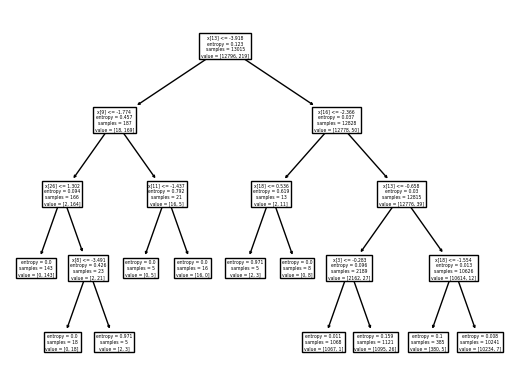

In [ ]:
# отрисовка дерева решений

from sklearn.tree import plot_tree

best_tree_classifier = DecisionTreeClassifier(random_state=4, criterion='entropy', max_depth=4, min_samples_leaf=5)
best_tree_classifier.fit(X_train, y_train)
plot_tree(best_tree_classifier)

In [ ]:
# Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble


estimators = [('log', LogisticRegression(random_state=42, max_iter=1000)),
              ('svc', SVC(random_state=42)),
              ('rf', ensemble.RandomForestClassifier(random_state=42))]

stacking = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=5))

stacking.fit(X_train, y_train)


y_pred = stacking.predict(X_test) # прогоняем тестовые данные
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


#('dtc', DecisionTreeClassifier(random_state=4, criterion='entropy', max_depth=4, min_samples_leaf=5))
#estimators = [('log', LogisticRegression(random_state=42, max_iter=1000)),
#              ('svc', SVC(random_state=42))]

#stacking = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=5))

#stacking.fit(X_train, y_train)

[[8532    9]
 [  21  116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.93      0.85      0.89       137

    accuracy                           1.00      8678
   macro avg       0.96      0.92      0.94      8678
weighted avg       1.00      1.00      1.00      8678



In [ ]:
# bagging (random forest classifier)
from sklearn.ensemble import RandomForestClassifier


rand_forest = RandomForestClassifier(random_state=101, criterion='gini')
rand_forest.fit(X_train, y_train)

y_pred_forest = rand_forest.predict(X_test)

print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


[[8538    3]
 [  22  115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.84      0.90       137

    accuracy                           1.00      8678
   macro avg       0.99      0.92      0.95      8678
weighted avg       1.00      1.00      1.00      8678



In [ ]:
# gradient boosting

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[8535    6]
 [  22  115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.95      0.84      0.89       137

    accuracy                           1.00      8678
   macro avg       0.97      0.92      0.94      8678
weighted avg       1.00      1.00      1.00      8678

